# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Challenge 1

#### The data we will use in this challenge is:

In [8]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

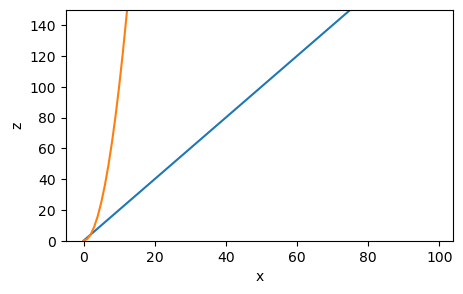

In [17]:
# Method 1
plt.figure(figsize=(5, 3))

# x vs. y graphic
plt.plot(x, y, label='y')
plt.ylim([0, 150])
plt.xlabel('x')
plt.ylabel('y')

# x vs. z graphic
plt.plot(x, z, label='z')
plt.ylim([0, 150])
plt.xlabel('x')
plt.ylabel('z')

# Show the graphic
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

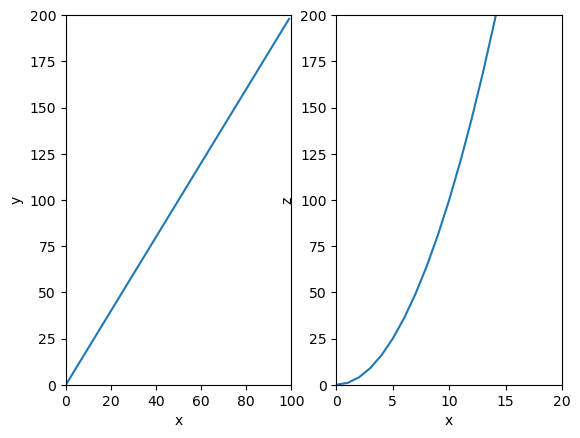

In [18]:
# Method 2
# Create one graphic with two subplots
fig, axs = plt.subplots(ncols = 2,
                       nrows = 1)
# Configure the first graphic
axs[0].plot(x, y)  
axs[0].set(xlim=[0, 100],
           ylim=[0, 200],
           xlabel='x',
           ylabel='y')
# Configure the second graphic
axs[1].plot(x, z)   
axs[1].set(xlim=[0, 20],
           ylim=[0, 200],
           xlabel='x',
           ylabel='z')
# Show the graphic
plt.show();

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

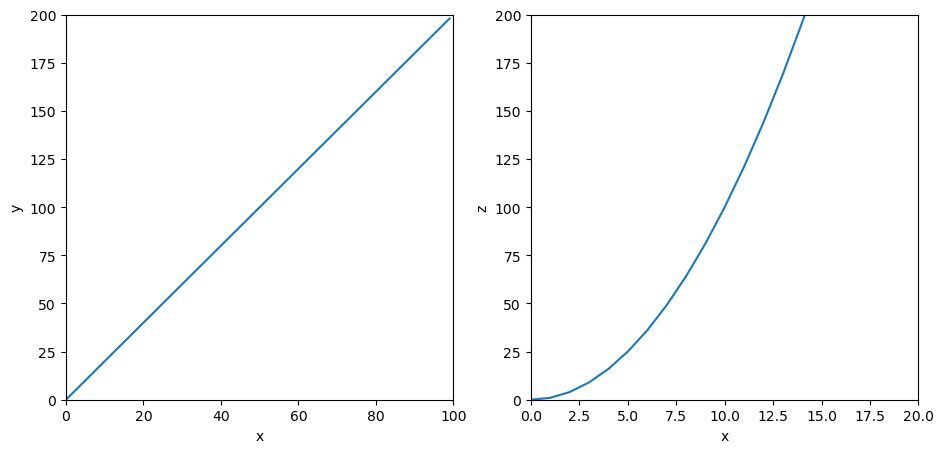

In [19]:
# your code here
fig, axs = plt.subplots(ncols = 2,
                       nrows = 1,
                       figsize= (11,5))
# Configure the first graphic
axs[0].plot(x, y)  
axs[0].set(xlim=[0, 100],
           ylim=[0, 200],
           xlabel='x',
           ylabel='y')

# Configure the second graphic
axs[1].plot(x, z)   
axs[1].set(xlim=[0, 20],
           ylim=[0, 200],
           xlabel='x',
           ylabel='z')
# Show the graphic
plt.show();

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

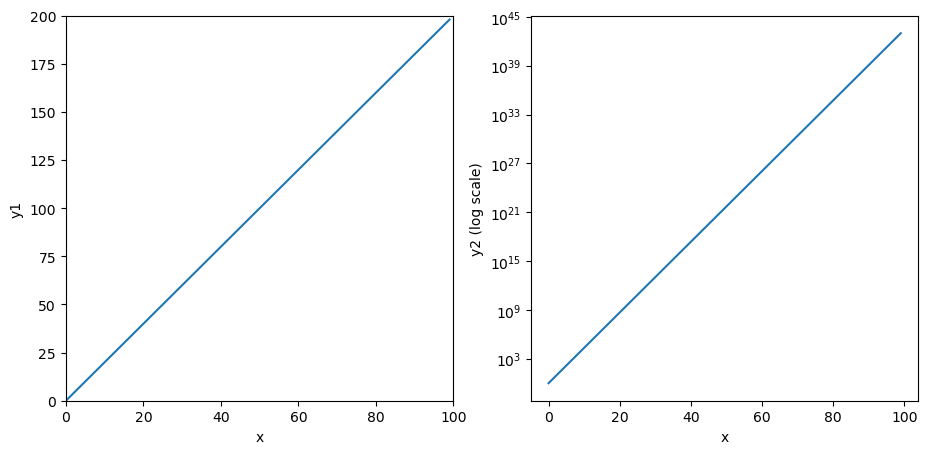

In [31]:
# your code here
y1 = x*2
y2 = [math.exp(xi) for xi in x]

fig, axs = plt.subplots(ncols = 2,
                       nrows = 1,
                       figsize= (11,5))

# Configure the first graphic
axs[0].plot(x, y1)  
axs[0].set(xlim=[0, 100],
           ylim=[0, 200],
           xlabel='x',
           ylabel='y1')

# Configure the second graphic
axs[1].plot(x, y2)   
axs[1].set_xlabel('x')
axs[1].set_ylabel('y2 (log scale)')
# convert y-axis to Logarithmic scale
axs[1].set_yscale('log')

# Show the graphic
plt.show();

#### As a bonus challenge, try to add a legend to the plot.

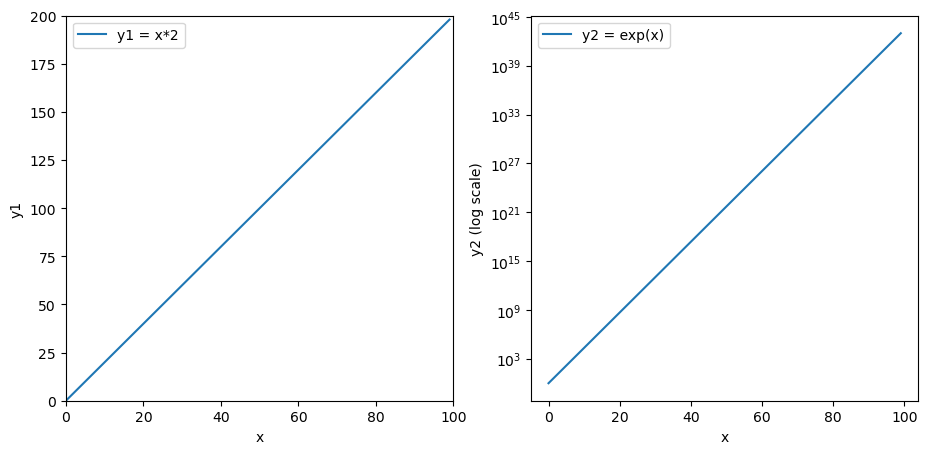

In [41]:
# your code here
y1 = x*2
y2 = [math.exp(xi) for xi in x]

fig, axs = plt.subplots(ncols = 2,
                       nrows = 1,
                       figsize= (11,5))

# Configure the first graphic
axs[0].plot(x, y1, label='y1 = x*2')  
axs[0].set(xlim=[0, 100],
           ylim=[0, 200],
           xlabel='x',
           ylabel='y1')
axs[0].legend()

# Configure the second graphic
axs[1].plot(x, y2, label='y2 = exp(x)')   
axs[1].set_xlabel('x')
axs[1].set_ylabel('y2 (log scale)')
# convert y-axis to Logarithmic scale
axs[1].set_yscale('log')
axs[1].legend()

# Show the graphic
plt.show();

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [78]:
# your code here
df = pd.read_csv("../data/fitbit2.csv", sep=',')

# Transform the dataframe in order to be able to perform graphical representation
df['Date'] = pd.to_datetime(df['Date'])   # Change the data type of Date column, str to datetime.
df = df.sort_values(by='Date')   # Sort the Date column.

df.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

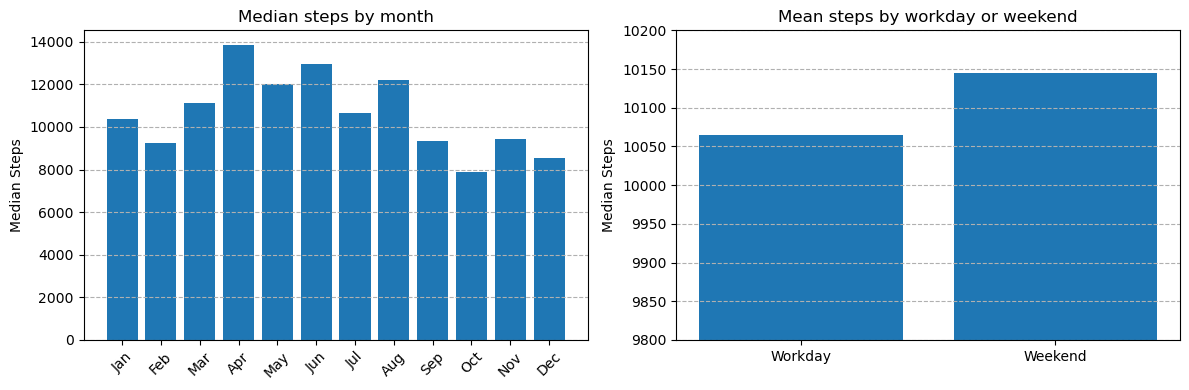

In [103]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
df_months = df[['Steps', 'Months_encoded']]   # Extract this two columns in a new dataframe.
median_months_df = df_months.groupby('Months_encoded').median()   # Group by 'Days' columns and do the mean per day.

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
df_days = df[['Steps', 'Work_or_Weekend']]   # Extract this two columns in a new dataframe.
mean_days_df = df_days.groupby('Work_or_Weekend').mean()   # Group by 'Days' columns and do the mean per day.

# GRAPHICS
fig, axs = plt.subplots(ncols = 2,
                       nrows = 1,
                       figsize= (12,4))

# SUBPLOT 1
plt.sca(axs[0])   # With that is possible to select the current axis to do the graphic.
plt.bar(median_months_df.index, median_months_df['Steps'])
plt.title('Median steps by month')
#plt.xlabel('Month')
plt.ylabel('Median Steps')
plt.xticks(median_months_df.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--')  # Add grid.

# SUBPLOT 2
plt.sca(axs[1])   # With that is possible to select the current axis to do the graphic.
plt.bar(mean_days_df.index, mean_days_df['Steps'])
plt.title('Mean steps by workday or weekend')
#plt.xlabel('Workday or Weekend')
plt.ylabel('Median Steps')
plt.xticks(mean_days_df.index, ['Workday', 'Weekend'])
plt.ylim(9800, 10200)   # The difference between the two values is so small that the y-axis has to be modified to make it 
                        # easier to observe and draw conclusions.
plt.grid(axis='y', linestyle='--')  # Add grid

plt.tight_layout()   # With that, automatically adjusts the figure layout parameters to make sure that the elements in the 
                     # chart do not overlap.
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

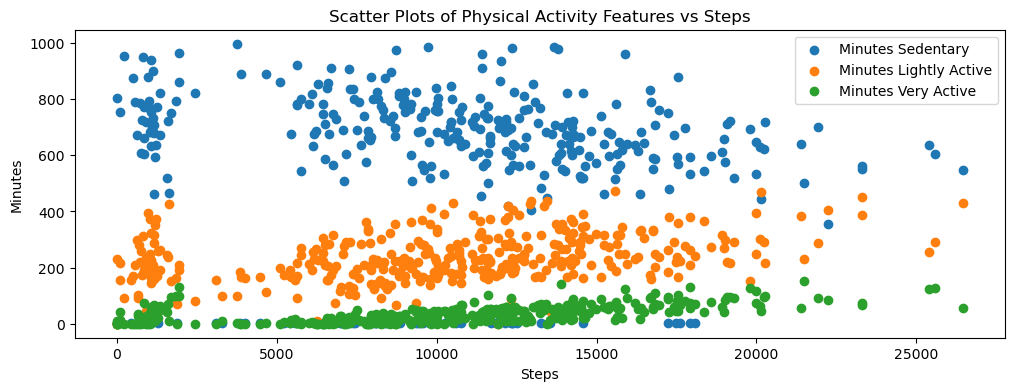

In [106]:
features = ['Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Very Active']
plt.figure(figsize=(12, 4))

# Loop to create the graphics
for feature in features:
    plt.scatter(df['Steps'], df[feature], label=feature)

# Configure the title, tags and legend
plt.xlabel('Steps')
plt.ylabel('Minutes')
plt.title('Scatter Plots of Physical Activity Features vs Steps')
plt.legend()
plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [107]:
# your code here
df = pd.read_csv("../data/titanic.csv", sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [109]:
# your code here
numbers = df.select_dtypes(np.number)
numbers.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [110]:
# NUMERICAL VARIABLES
# your code here
numbers = df.select_dtypes(np.number)
numbers.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [112]:
# CATEGORICAL VARIABLES
# your code here
numbers = df.select_dtypes(include=['object'])
numbers.head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [116]:
# your code here
sns.set(style="whitegrid")   # style must be one of white, dark, whitegrid, darkgrid, ticks
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

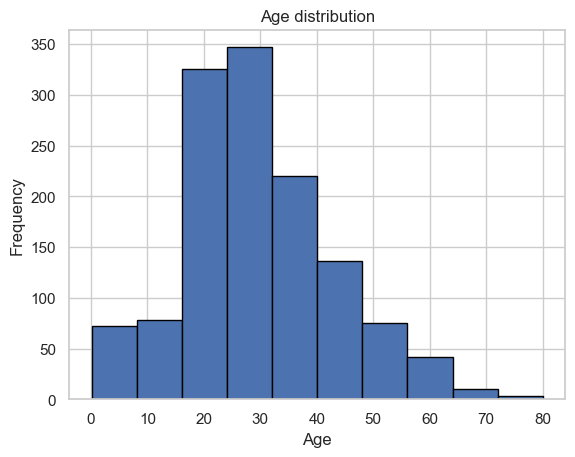

In [124]:
# your code here
plt.hist(df['Age'], edgecolor='black')   # It's possible use 'df.dropna()', to remove the nan
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

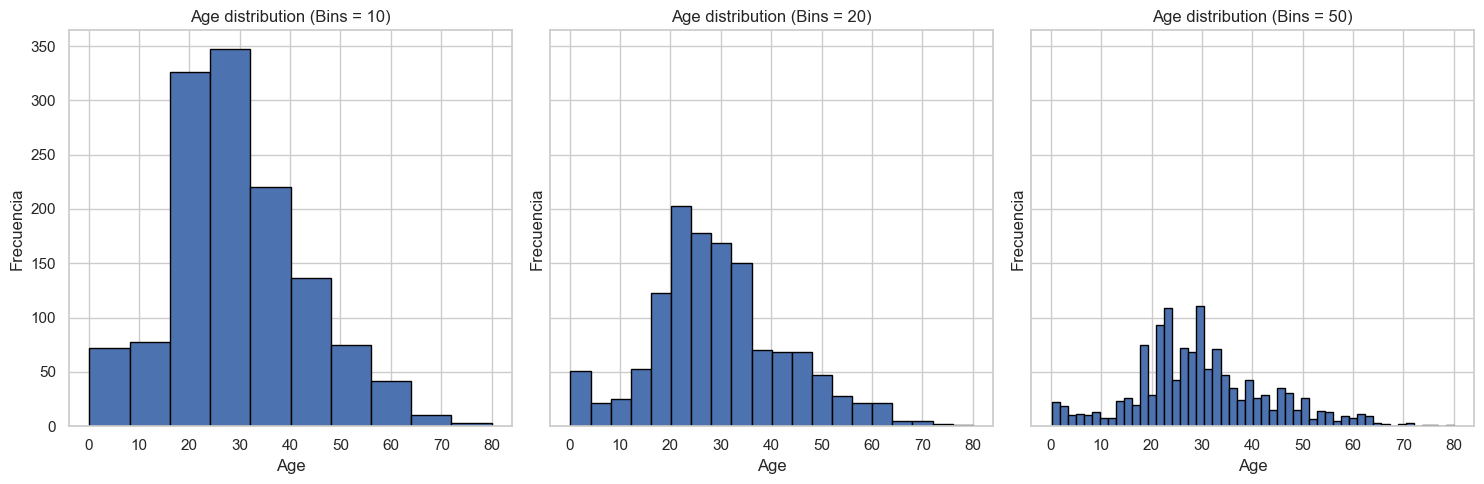

In [123]:
# your code here
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)   # sharey=True option means that the subplots have the same axis

# Diferentes números de bins
bins_values = [10, 20, 50]

for i, bins in enumerate(bins_values, 1):
    axs[i-1].hist(df['Age'], bins=bins, edgecolor='black')
    axs[i-1].set_title(f'Age distribution (Bins = {bins})')
    axs[i-1].set_xlabel('Age')
    axs[i-1].set_ylabel('Frequency')

# Adjust the spacing between subgraphs
plt.tight_layout()

# Show the graphics
plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
The larger the number of bins, the smaller the size of the bars and the lower the height. With a very high number, it can 
be difficult to interpret which bin has the highest value, while for a very low number of bins, it is equally difficult to 
know for which particular age the value is the highest.
"""

#### Use seaborn to show the distribution of column `Age`.

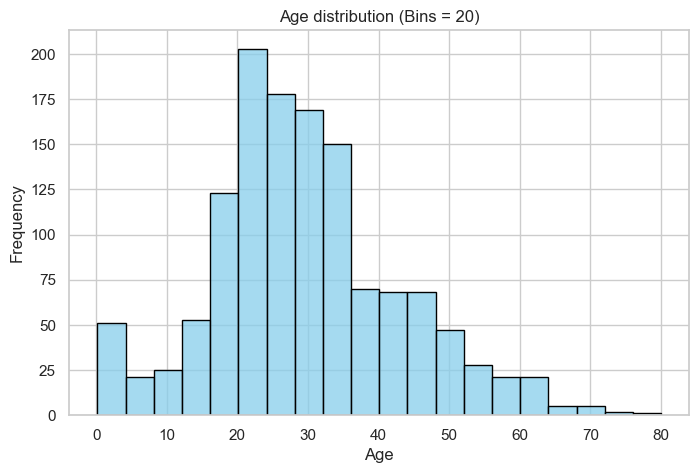

In [127]:
# your code here
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age distribution (Bins = 20)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the graphic
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

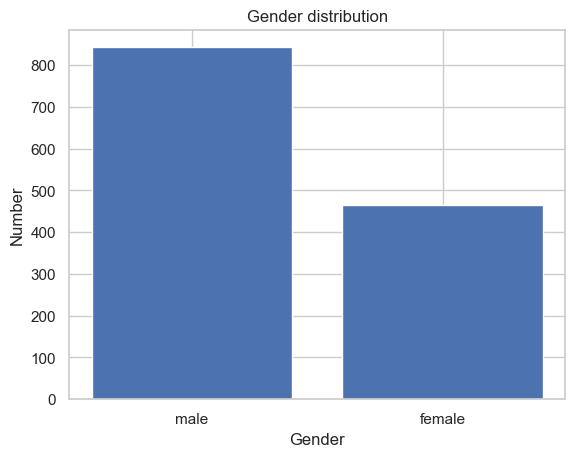

In [132]:
# Method 1 - matplotlib
# your code here
gender_counts = df['Gender'].value_counts()

# Create bar graphic
plt.bar(gender_counts.index, gender_counts.values)

# Configure the grafhic
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Number')

# Show the graphic
plt.show()

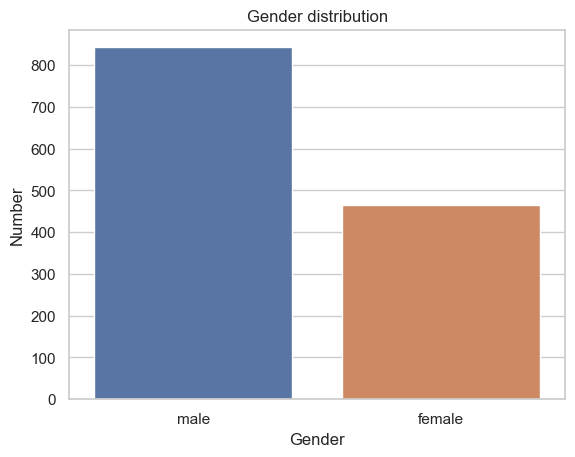

In [130]:
# Method 2 - seaborn
# your code here
sns.countplot(x='Gender', data=df)
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Number')
plt.show()

#### Use the right plot to visualize the column `Pclass`.

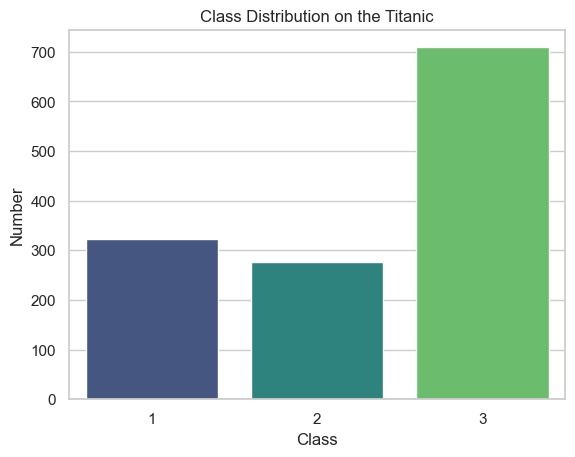

In [139]:
# your code here
df['Pclass'].unique()
# Store the number of repetitions for each class in a list.
class_counts = df['Pclass'].value_counts()

# Create the graphic
sns.countplot(x='Pclass', data=df, palette='viridis')
plt.title('Class Distribution on the Titanic')
plt.xlabel('Class')
plt.ylabel('Number')
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

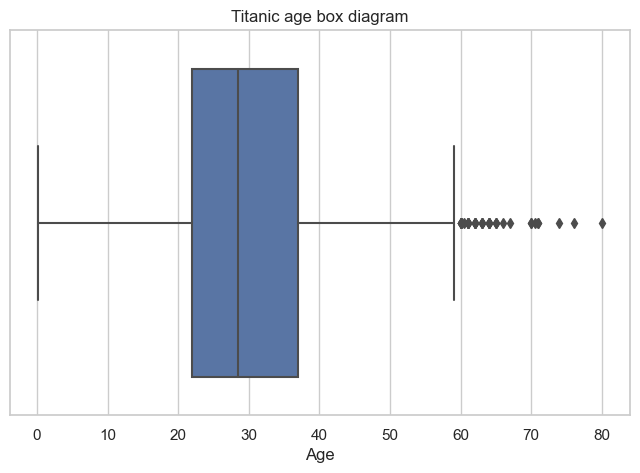

In [138]:
# your code here
plt.figure(figsize=(8, 5))
sns.boxplot(x='Age', data=df)
plt.title('Titanic age box diagram')
plt.xlabel('Age')
plt.show()

In [ ]:
"""
I understood that I had to make a chart with a single element, so I would use the box plot for that.
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
This graph indicates that the median is close to 30 years old and the first and first quartile are between 20 and 30 years 
old. Values above 59 years are considered outliers, I mean, they occur very infrequently compared to the rest. 
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [149]:
"""
# your code here
plt.figure(figsize=(12, 6))

# Box diagram
plt.subplot(1, 2, 1)
sns.boxplot(x='Age', data=df, color='skyblue')
plt.title('Age box diagram')

# Violin diagram
plt.subplot(1, 2, 2)
sns.violinplot(x='Age', data=df, color='salmon')
plt.title('Age violing diagram')

plt.tight_layout()
plt.show()
"""

"\n# your code here\nplt.figure(figsize=(12, 6))\n\n# Box diagram\nplt.subplot(1, 2, 1)\nsns.boxplot(x='Age', data=df, color='skyblue')\nplt.title('Age box diagram')\n\n# Violin diagram\nplt.subplot(1, 2, 2)\nsns.violinplot(x='Age', data=df, color='salmon')\nplt.title('Age violing diagram')\n\nplt.tight_layout()\nplt.show()\n"

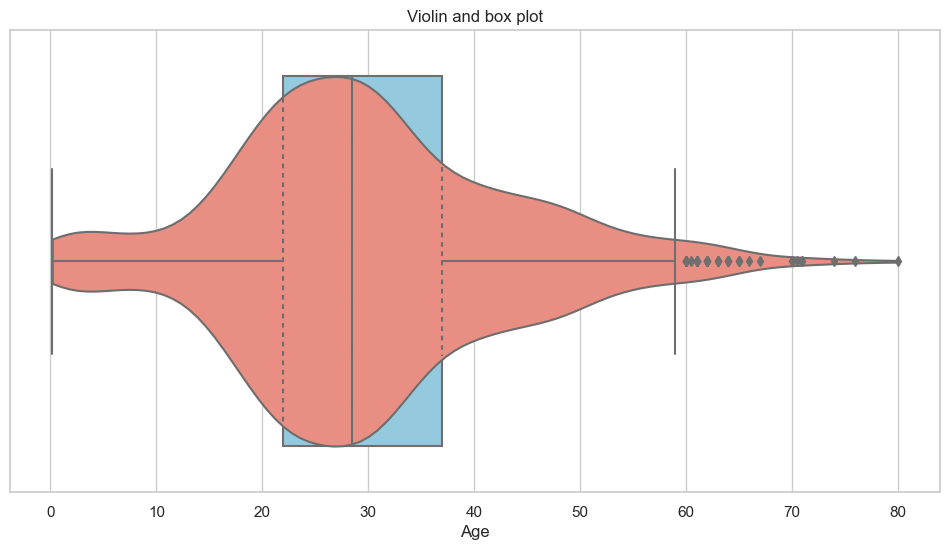

In [150]:
plt.figure(figsize=(12, 6))

sns.violinplot(x='Age', data=df, color='salmon', inner='quartile', cut=0)  # Violín plot. Cut=0 due to the ages aren't negative
sns.boxplot(x='Age', data=df, color='skyblue')
plt.title('Violin and box plot')
plt.xlabel('Age')
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
It's possible to see more information related to distribution of the ages.
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

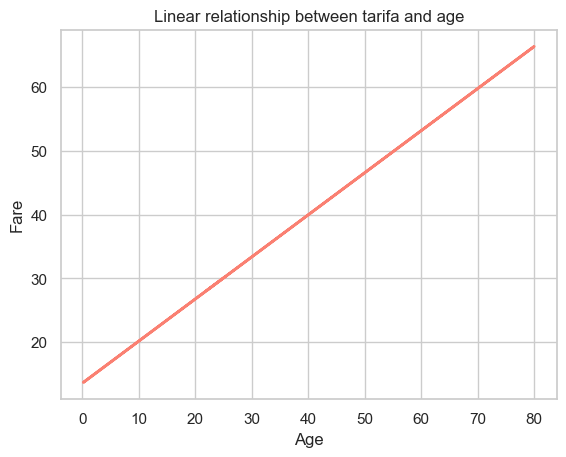

In [159]:
# Method 1 - matplotlib
# your code here
x = df['Age']
y = df['Fare']

# Calculate the linear regresion
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)

# Plot the linear regresion
plt.plot(x, polynomial(x), color='salmon', linewidth=2)

plt.title('Linear relationship between tarifa and age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

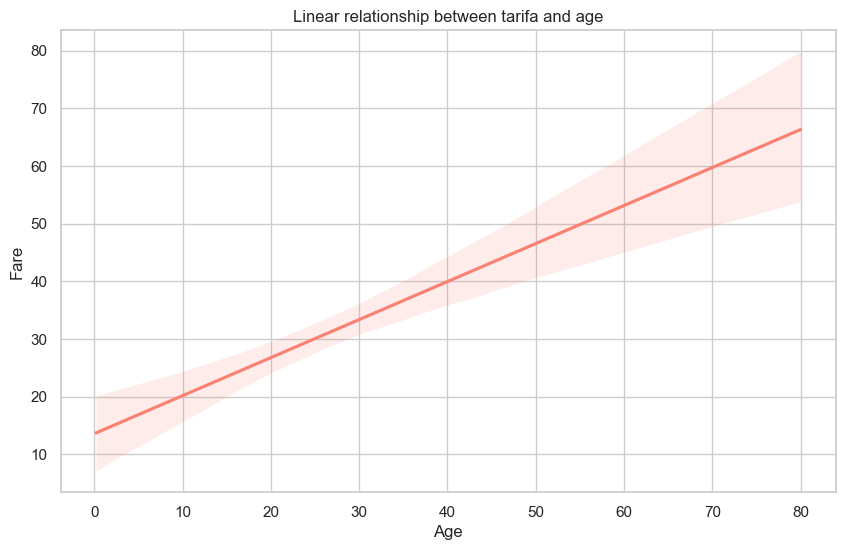

In [160]:
# Method 2 - seaborn
# your code here
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Fare', data=df, scatter=False, line_kws={'color': 'salmon'})

plt.title('Linear relationship between tarifa and age')
plt.xlabel('Age')
plt.ylabel('Fare')

# Mostrar el gráfico
plt.show()

#### Plot the correlation matrix using seaborn.

Text(0, 0.5, 'Fare')

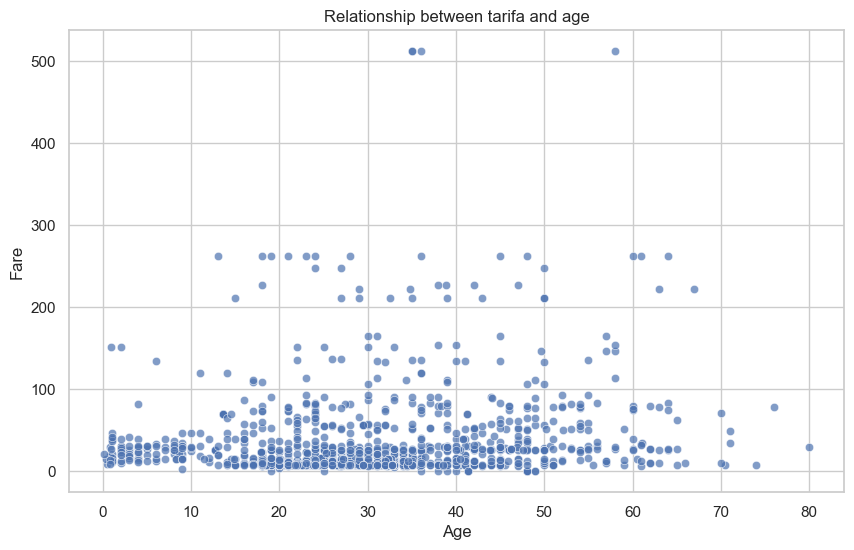

In [153]:
# your code here
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df, alpha=0.7)   # With alpha it is possible to adjust the transparency and color.
plt.title('Relationship between tarifa and age')
plt.xlabel('Age')
plt.ylabel('Fare')

#### What are the most correlated features?

In [ ]:
"""
The older the age, the higher the passenger fare.
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

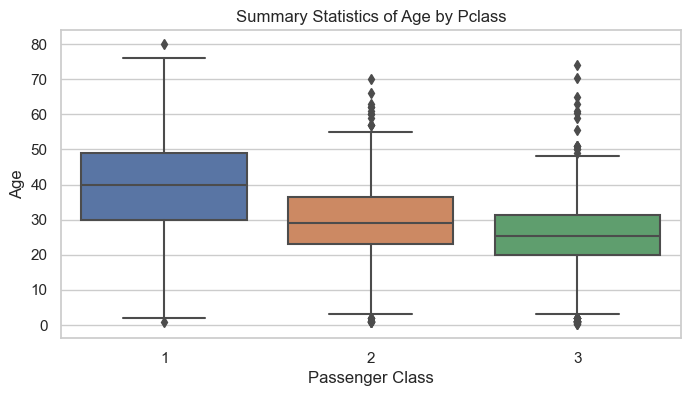

In [164]:
# your code here
plt.figure(figsize=(8, 4))
sns.boxplot(x='Pclass', y='Age', data=df)

plt.title('Summary Statistics of Age by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Age')

# Show the plot
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

C:\Users\carlo\miniconda3\envs\m2_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


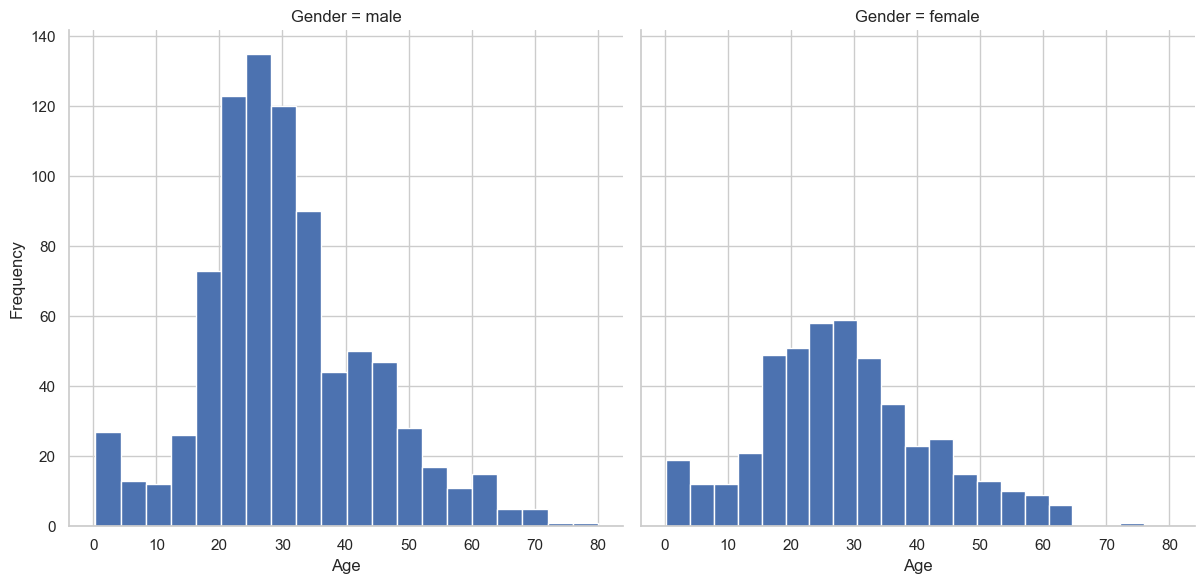

In [176]:
# your code here
# Create a FacetGrid with histograms for Age based on Gender
graph = sns.FacetGrid(df, col="Gender", height=6)
graph.map(plt.hist, "Age", bins=20)

# Set titles and labels
graph.set_axis_labels("Age", "Frequency")
graph.set_titles(col_template="Gender = {col_name}")

# Show the plot
plt.show()